**Amazon Review Sentiment Analysis**

Install Packages & Import Libraries

In [ ]:
#Install Packages
%pip install pandas numpy matplotlib vaderSentiment wordcloud nltk seaborn

#Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load Data

In [ ]:
#Load Data (Random 50k Sample)
df = pd.read_csv("Reviews.csv")
df = df.sample(n=min(50000, len(df)), random_state=42)
print('Number of Rows and Columns', df.shape)
df.head()

Number of Rows and Columns (50000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


Review Text Cleaning

In [ ]:
#Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['Text'], inplace=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

df['cleaned_text'] = df['Text'].apply(clean_text)
df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
165256,Having tried a couple of other brands of glute...,tried couple brand gluten free sandwich cooky ...
231465,My cat loves these treats. If ever I can't fin...,cat love treat ever find house pop top bolt wh...
427827,A little less than I expected. It tends to ha...,little less expected tends muddy taste expecte...
433954,"First there was Frosted Mini-Wheats, in origin...",first frosted mini wheat original size frosted...
70260,and I want to congratulate the graphic artist ...,want congratulate graphic artist putting entir...


Time Conversion

In [ ]:
#Converting Time to Month and Year
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['month'] = df['Time'].dt.month
df['year'] = df['Time'].dt.year

Sentiment Analysis

In [ ]:
analyzer = SentimentIntensityAnalyzer()

df["compound"] = df["cleaned_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
df["sentiment"] = df["compound"].apply(lambda c: "Positive" if c > 0.05 else ("Negative" if c < -0.05 else "Neutral"))

df[["Text","compound","sentiment"]].head()

,Text,compound,sentiment
165256,Having tried a couple of other brands of glute...,0.9840,Positive
231465,My cat loves these treats. If ever I can't fin...,0.9836,Positive
427827,A little less than I expected. It tends to ha...,0.4588,Positive
433954,"First there was Frosted Mini-Wheats, in origin...",0.9918,Positive
70260,and I want to congratulate the graphic artist ...,0.9714,Positive


Charts

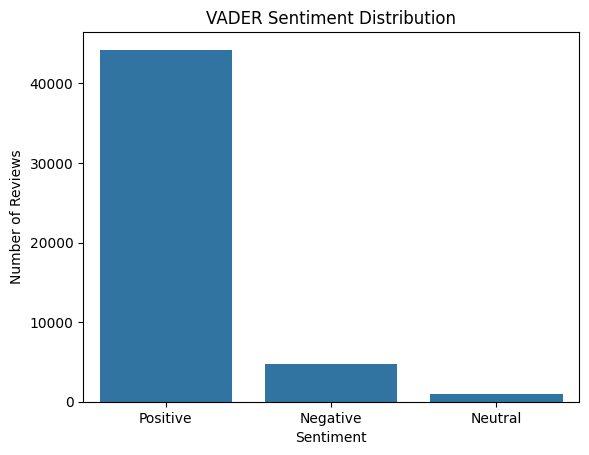

In [ ]:
# VADER Sentiment distribution

sns.countplot(x='sentiment', data=df)
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

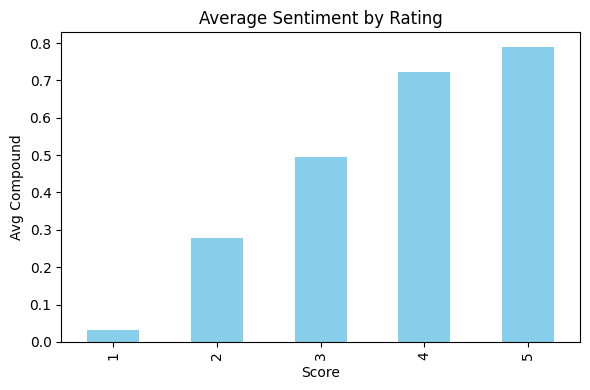

In [ ]:
if "Score" in df.columns:
    avg_rating = df.groupby("Score")["compound"].mean()
    avg_rating.plot(kind="bar", color="skyblue", title="Average Sentiment by Rating", figsize=(6,4))
    plt.ylabel("Avg Compound")
    plt.tight_layout()
    plt.show()

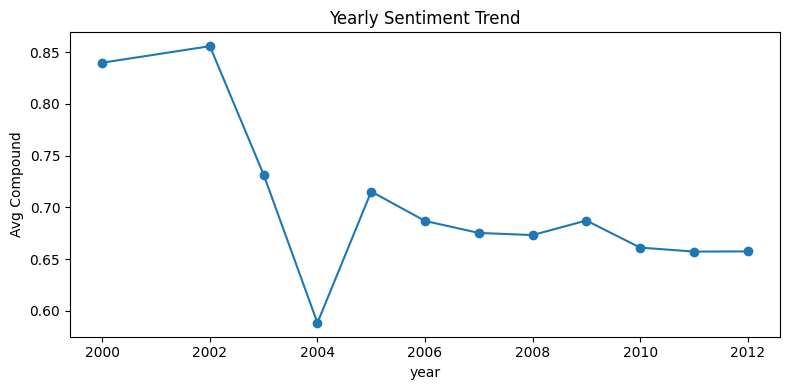

In [ ]:
if "year" in df.columns:
    monthly = df.groupby("year")["compound"].mean()
    monthly.plot(kind="line", marker="o", title="Yearly Sentiment Trend", figsize=(8,4))
    plt.ylabel("Avg Compound")
    plt.tight_layout()
    plt.show()

Export Data

In [ ]:
df.to_csv("reviews_scored.csv", index=False)